In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_loss(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def bar_plot_best_loss_per_model(histories):
    best_loss = []
    for history in histories.values():
        best_loss.append(min(history['val_loss']))
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(histories.keys()), y=best_loss)
    # add the value of the best loss to the bar
    for i, v in enumerate(best_loss):
        plt.text(i, v, str(round(v, 4)), color='black', ha='center')
    plt.title('best loss per model')
    plt.ylabel('best loss')
    plt.xlabel('model')
    plt.show()

In [3]:
# Iterate through all files in results folder
losses = dict()
for file in os.listdir('../results'):
    # Check whether file is in text format or not
    if file.endswith(".pickle"):
        # Create the full input path and read the file
        input_path = os.path.join('../results', file)
        with open(input_path, 'rb') as input_file:
            history = pickle.load(input_file)
        # Add history to dictionary
        model_name = 'model_' + file.split('_')[2] + '_' + file.split('_')[3]
        losses[model_name] = {'loss' : history['loss'], 'val_loss' : history['val_loss']}

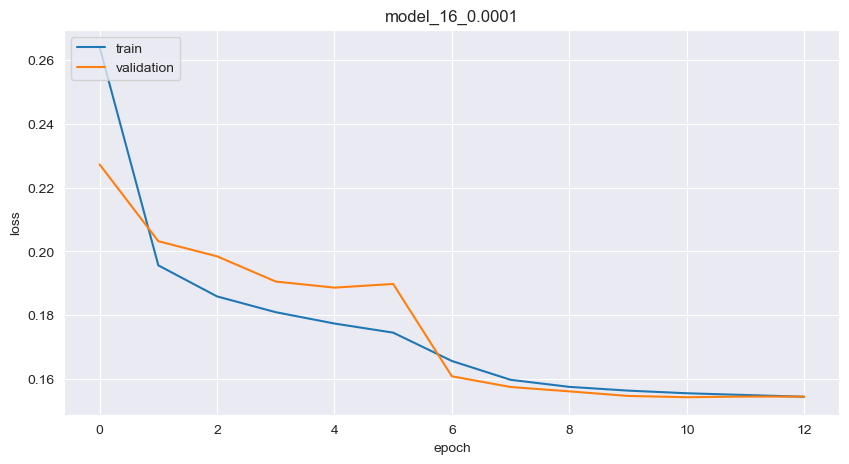

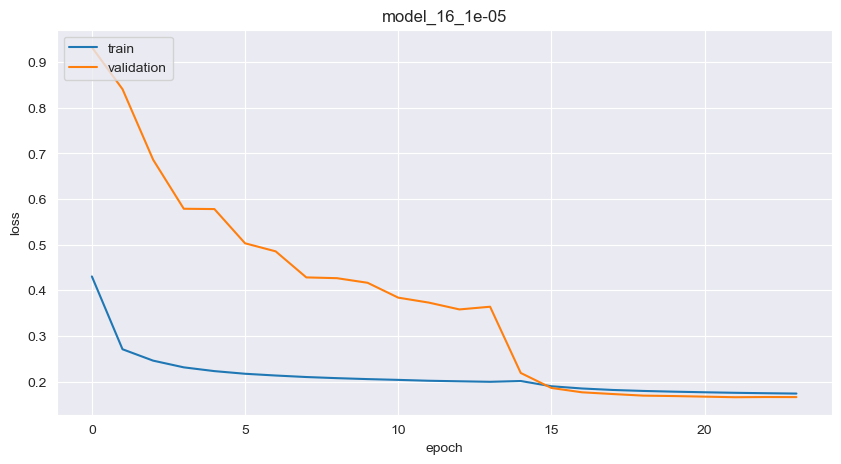

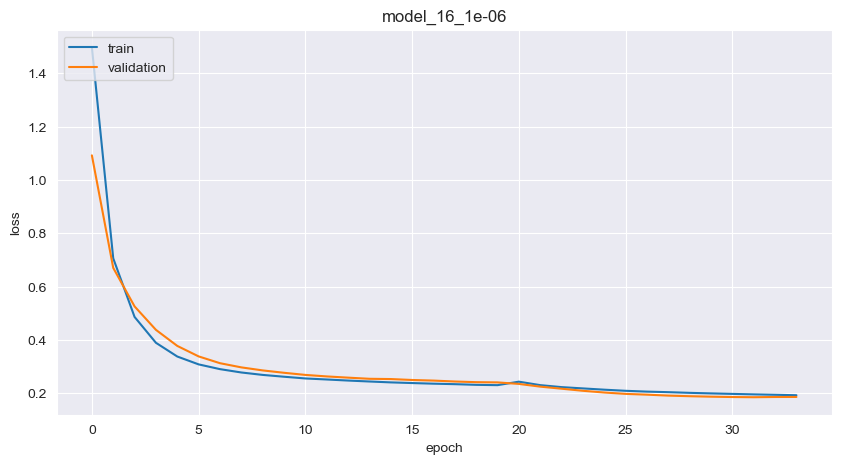

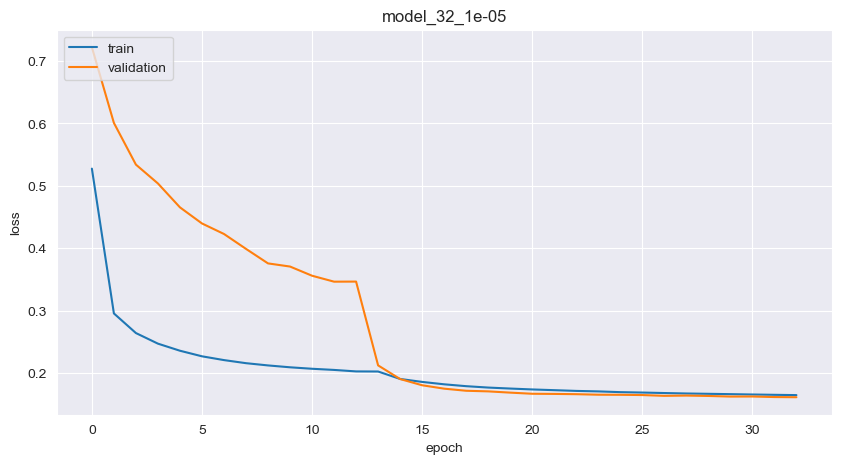

In [4]:
for model in losses:
    plot_loss(losses[model], model)

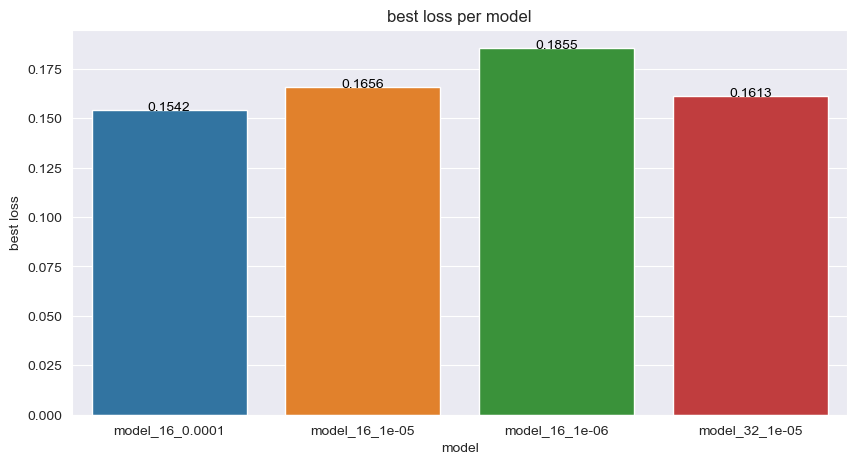

In [5]:
bar_plot_best_loss_per_model(losses)